<a href="https://colab.research.google.com/github/jamissonfreitas/IN1167/blob/master/Cap1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 1 e 2 - Atividade

In [0]:
import pandas as pd
import io
import requests
# lib to plot the data
import matplotlib.pyplot as plt
# lib to use the decompositio in the time series
from statsmodels.tsa.seasonal import seasonal_decompose
# lib to use the acf and pcf correlations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# lib to organize the data in data frame
from pandas import DataFrame
# lib to organize the time series by periods
from pandas import TimeGrouper

**1. Bases selecionadas** de https://github.com/FinYang/tsdl/tree/master/data-raw

*   Com sazonalidade
*   Com tendência determinística
*   Série financeira ou climática



## TREE RIVER,10QA001, 1969-76, MEAN MONTHLY FLOW

In [45]:
#url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/monthly/tpmon.dat'
url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/baracos/cminef.dat'
data = requests.get(url).content
data = data.decode('utf-8').split('\n')[1:]
data = [' '.join(d.strip().split()) for d in data]
data = ' '.join(data)
data = data.split(' ')
len(data)

96

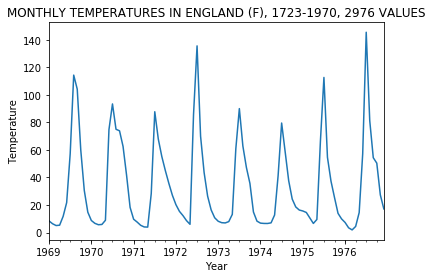

In [46]:
series = pd.Series(
    data,#[:-1], 
    #index=pd.date_range(start ='1-1-1723', end ='1-1-1971', freq ='M')
    index=pd.date_range(start ='1-1-1969', end ='1-1-1977', freq ='M')
    
)
series = series.astype(float)
series.plot()
plt.title('MONTHLY TEMPERATURES IN ENGLAND (F), 1723-1970, 2976 VALUES')
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

### Boxplot anual

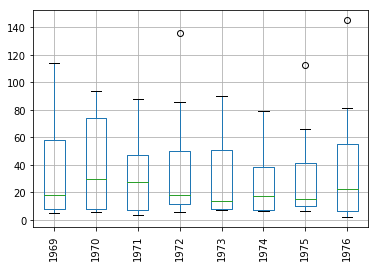

In [47]:
# to plot by year
groups = series.groupby(pd.Grouper(freq='A')) #TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
plt.figure()#figsize=(15,8))
ax = years.boxplot()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Boxplot Mensal

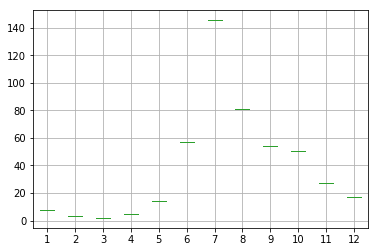

In [48]:
# to plot by month
groups = series.groupby(pd.Grouper(freq='M')) #TimeGrouper('M'))
years = DataFrame()
for name, group in groups:
    years[name.month] = group.values
years.boxplot()
plt.show()

### Decompose

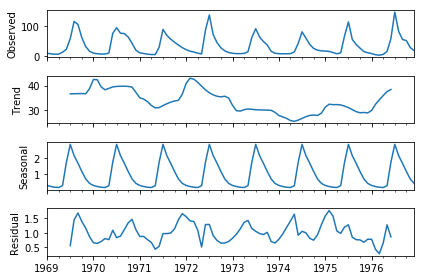

In [49]:
# to decompose the time series
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

### Auto-Correlation Function (ACF)

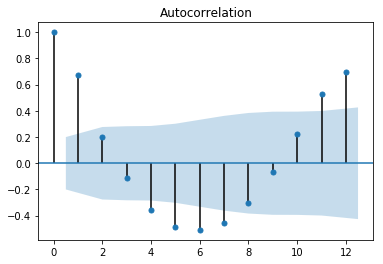

In [50]:
# to use the acf
plot_acf(series, lags=12)
plt.show()

### Partial Auto-Correlation Function (PACF)

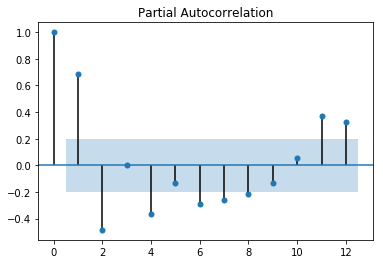

In [51]:
# to use the pacf
plot_pacf(series, lags=12)
plt.show()

### ACF for resid

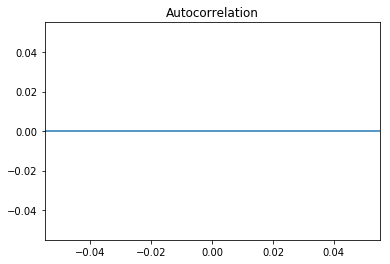

In [52]:
# to plot the acf above the residual time series
#result.trend; result.seasonal; result.resid; result.observed 
plot_acf(result.resid, lags=12)
plt.show()

## Annual Number of Lynx Trapped, MacKenzie River

In [54]:
url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/ecology1/lynx.dat'
data = requests.get(url).content
data = data.decode('utf-8').split('\n')[9:]
data = [' '.join(d.strip().split()) for d in data]
data = ' '.join(data)
data = data.split(' ')
len(data)

114

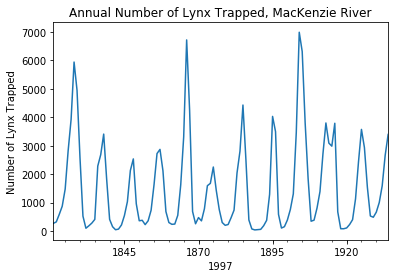

In [56]:
s1 = pd.Series(
    data,
    index=pd.date_range(start ='1-1-1821', end ='4-7-1935', freq ='Y')
) 
s1 = s1.astype(float)
plt.xlabel('1997')
plt.ylabel('Number of Lynx Trapped')
plt.title('Annual Number of Lynx Trapped, MacKenzie River')
s1.plot()

## GOLD CLOSE PRICE, 97 SUCCESSIVE TRADING DAYS

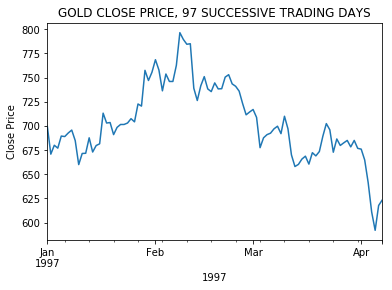

In [33]:
url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/commod/gold.dat'
s = requests.get(url).content
data = ' '.join([l.strip() for l in s.decode('utf-8').split('\n')[1:]])
s1 = pd.Series(
    data.split(' '),
    index=pd.date_range(start ='1-1-1997', end ='4-7-1997', freq ='D')
) 
s1 = s1.astype(float)
plt.xlabel('1997')
plt.ylabel('Close Price')
plt.title('GOLD CLOSE PRICE, 97 SUCCESSIVE TRADING DAYS')
s1.plot()

### Auto-Correlation Function (ACF)

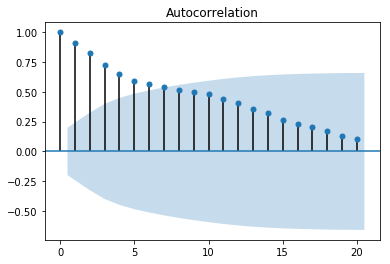

In [34]:
plot_acf(s1, lags=20)
plt.show()

### Partial Auto-Correlation Function (PACF)

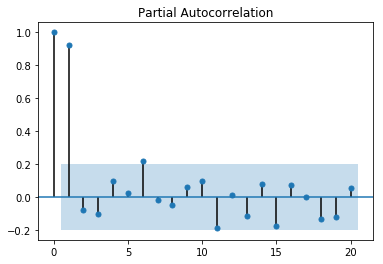

In [35]:
plot_pacf(s1, lags=20)
plt.show()

### Decomposition

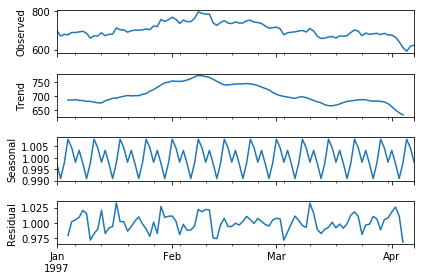

In [36]:
result = seasonal_decompose(s1, model='multiplicative')
result.plot()
plt.show()

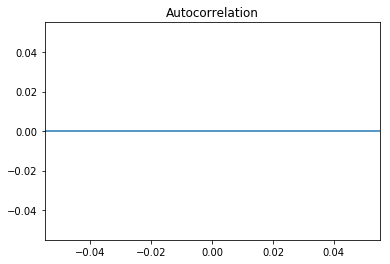

In [37]:
# to plot the acf above the residual time series
#result.trend; result.seasonal; result.resid; result.observed 
plot_acf(result.resid, lags=12)
plt.show()